<img align="left" src = https://paulgregorymedia.com/wp-content/uploads/2022/04/New-BenU-Logo.png width=300 style="padding: 10px"> 
<br><b>Displaying a mosaic image</b> <br>
Authors: Arman Svoboda and Matthew Wiesner <br>
Last verified to run: 2023-07-17 <br>
LSST Science Pipelines version: Weekly 2023_21 <br>
Container size: large <br>

## Displays a set of calibrated exposures in a mosaic, so we can view 1 square degree

In [5]:
import warnings
import matplotlib.pyplot as plt

from lsst.afw.display import Mosaic
from lsst.daf.butler import Butler
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import gc

## Call the Butler for DP0.2

In [2]:
#Call the Butler, load in DP0.2 tables

butler = Butler('dp02', collections='2.2i/runs/DP0.2')
registry = butler.registry

## How many images do you want to display? What chip do you want to start the display on?

In [6]:
x = 10  #This is the number of chips you would like to display
chip_start = 82  #This is the chip you want to start on (from 1 to 189)
display_in = 'matplotlib' #Either 'firefly' or 'matplotlib'

## Use the Butler to call calexps for x number of different detectors.

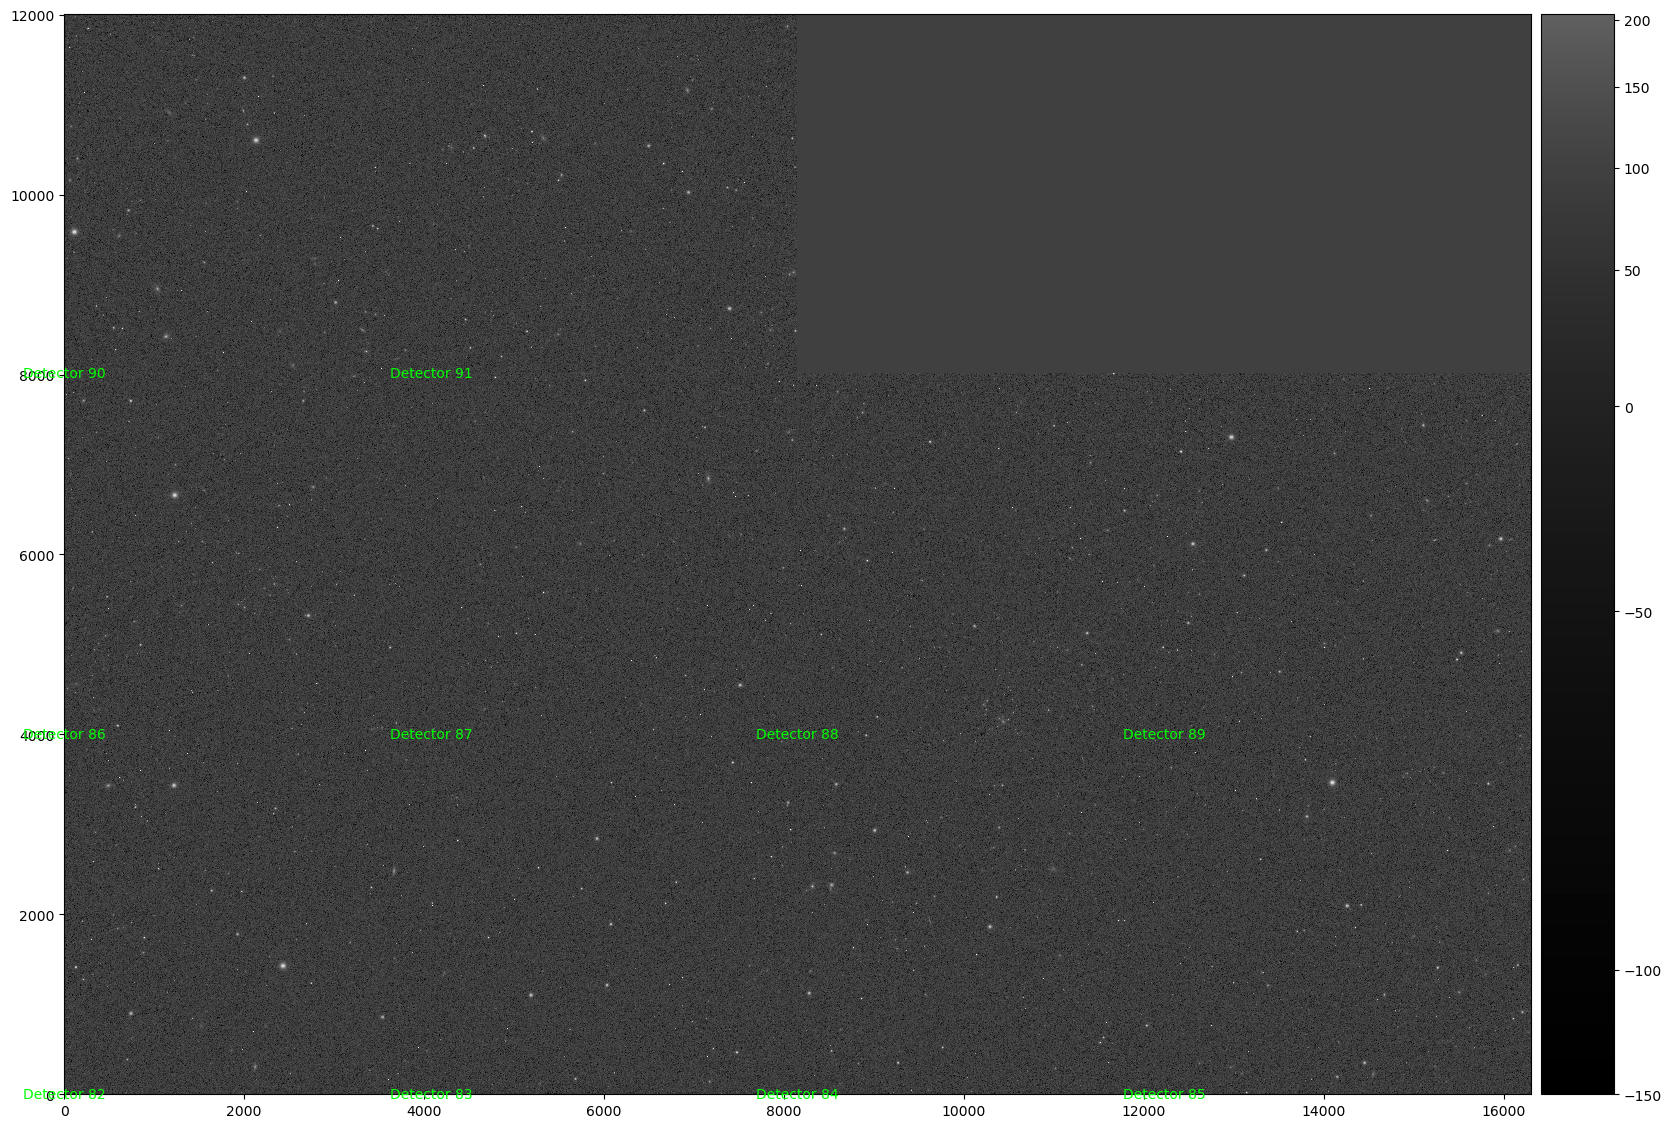

In [7]:
#We first choose the size of the figure. 
fig = plt.figure(figsize=(20,20))  

#This uses the mosaic command from lsst.afw.display.mosaic: https://pipelines.lsst.io/py-api/lsst.afw.display.Mosaic.html 
m = Mosaic()
m.setGutter(5)
m.setBackground(10)
m.setMode("square")  

labels=[]  #This makes sure the labels and images lists start empty
images= []

#This loop goes from the first detector above (chip_start) to the xth image and uses butler.get to obtain the image 

for i in range(0,x):
    name = "im"+str(i) #This is used to define the image variable name
    namer = "im"+str(i)+".image"  #This is used to populate the list of image names
    labels.append("Detector "+str(chip_start+i)) #this produces the list of image labels that will be displayed
    datad = "dataId"+str(i) 
    datad = {'visit': 1185205, 'detector': chip_start + i, 'band': 'r'} #This gives the visit, detector number and band for the Butler
    vars()[name] = butler.get('calexp', **datad)  #This does the actual call to the Butler and puts the data in an array called im1, im2, etc.
    images.append(namer) 

images2 = [eval(string) for string in images] #This converts the list of strings to a list of string literals

mosaic = m.makeMosaic(images2) #This actually creates the mosaic

#This if statement determines if the mosaic is displayed in firefly or matplotlib

if display_in == 'firefly':
    afwDisplay.setDefaultBackend('firefly') #This opens it in firefly. Uncomment below if you want it in matplotlib.
    display = afwDisplay.Display(frame=1)

else:
    afwDisplay.setDefaultBackend('matplotlib')
    display = afwDisplay.Display(frame=fig)

#This sets the display scale, displays the image and draws the labels
display.scale('asinh', 'zscale')
display.mtv(mosaic)
m.drawLabels(labels, display)